# Рассмотрим сделки по ЦПК, за 2022 год

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
data=pd.read_excel('2022.xlsx')

In [33]:
data.shape

(4103, 21)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   КодТО                       4103 non-null   int64  
 1   ИНН                         3018 non-null   object 
 2   СистемаНалогообложения      1355 non-null   object 
 3   ВыручкаОтПродаж             1934 non-null   float64
 4   КодОКВЭД                    367 non-null    object 
 5   Адрес                       2949 non-null   object 
 6   РегионОбслуживания          4103 non-null   object 
 7   Статус                      4103 non-null   object 
 8   Контрагент                  4103 non-null   object 
 9   Правовая форма              1953 non-null   object 
 10  ВидДеятельности             2509 non-null   object 
 11  КоличествоКЛК               4103 non-null   int64  
 12  СуммаСделки                 4103 non-null   float64
 13  Вид купленной номенклатуры  4103 

# Пустые строки:
- СистемаНалогообложения (2748);
- ВыручкаОтПродаж (2169)

# Проведем Анализ по сумме сделок

In [35]:
quantile_15 = data['СуммаСделки'].quantile(0.15)
quantile_20 = data['СуммаСделки'].quantile(0.20)
quantile_25 = data['СуммаСделки'].quantile(0.25)
median=data['СуммаСделки'].median()
quantile_75 = data['СуммаСделки'].quantile(0.75)

In [36]:
print('Квартили распределения суммы сделки')
print()
print(f'У 15% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nСумма сделки меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения суммы сделки

У 15% клиентов, у которых была сделка, 
Сумма сделки меньше 10710.0
а у 85% больше 10710.0


У 20% клиентов, у которых была сделка, 
Сумма сделки меньше 11580.000000000018
а у 80% больше 11580.000000000018


У 25% клиентов, у которых была сделка, 
Сумма сделки меньше 12600.0
а у 75% больше 12600.0


У 50% клиентов, у которых была сделка, 
Сумма сделки меньше 25200.0
а у 50% больше 25200.0


У 75% клиентов, у которых была сделка, 
Сумма сделки меньше 56900.0
а у 25% больше 56900.0


In [37]:
print(data[data['СуммаСделки']>0]['СуммаСделки'].min(),'Минимальная сумма сделки')
print(data['СуммаСделки'].mean(),'Средняя сумма сделки')
print(data['СуммаСделки'].max(),'Максимальная сумма сделки')
print(data['СуммаСделки'].sum(),'Сумма сделок за 2022 год')

99.0 Минимальная сумма сделки
52815.36903485255 Средняя сумма сделки
2261940.0 Максимальная сумма сделки
216701459.14999998 Сумма сделок за 2022 год


# Проведем Анализ по системе Налогообложения

In [38]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [39]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'КодТО':"count",'СуммаСделки':"sum"}) \
.rename(columns={"КодТО":"Количество сделок"}) \
.sort_values(by='СуммаСделки', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаСделки']*100/data_n_cnt['СуммаСделки'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаСделки','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаСделки,% Суммы Сделок
4,Не известно,2748,67.0,1.386227e+08,64.0
5,ОСНО,716,17.5,4.139932e+07,19.1
1,Бюджет,203,4.9,1.566881e+07,7.2
9,УСНО 6%,200,4.9,1.087862e+07,5.0
6,"ОСНО,УСНО",121,2.9,5.195868e+06,2.4
8,УСНО 15%,91,2.2,3.161799e+06,1.5
3,ЕСХН,11,0.3,6.497970e+05,0.3
2,ЕНВД,8,0.2,5.795500e+05,0.3
0,Аутсорсинг,4,0.1,5.411050e+05,0.2
7,Патент,1,0.0,3.900000e+03,0.0


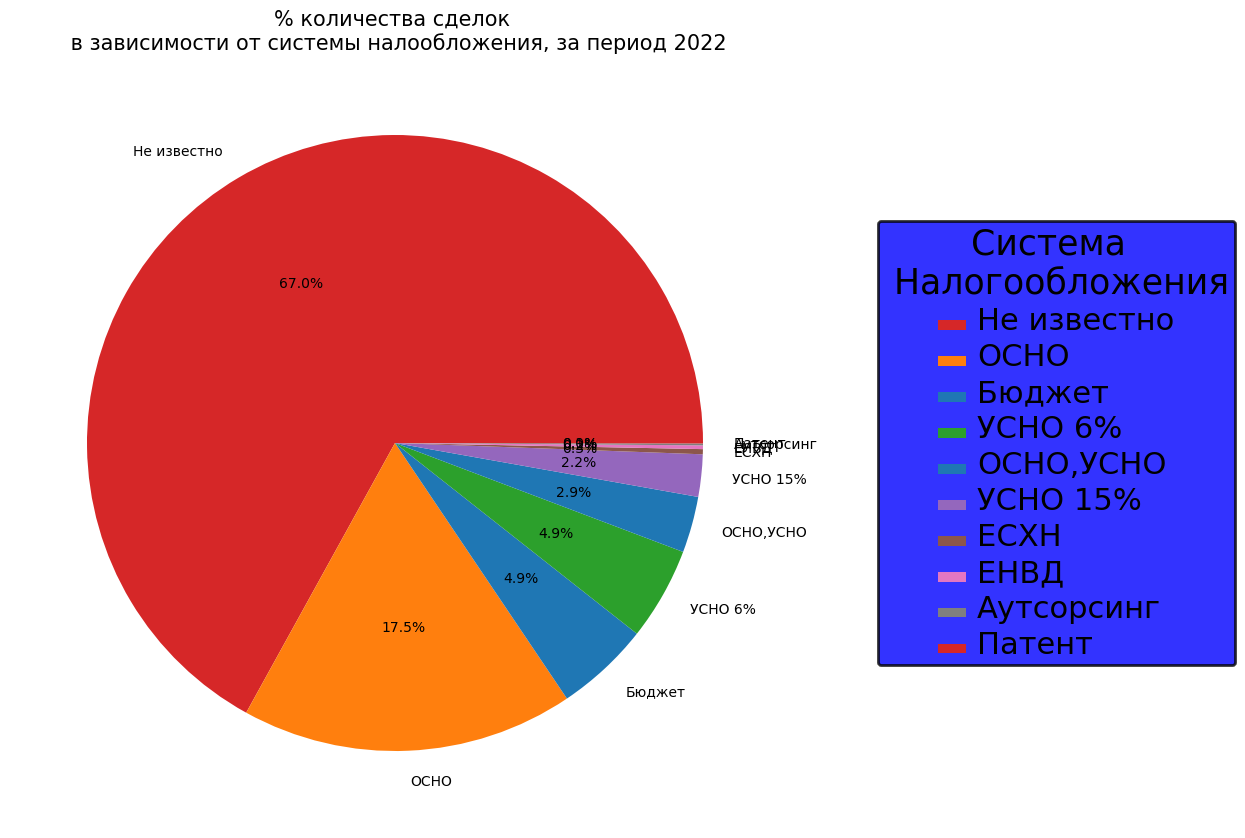

In [40]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

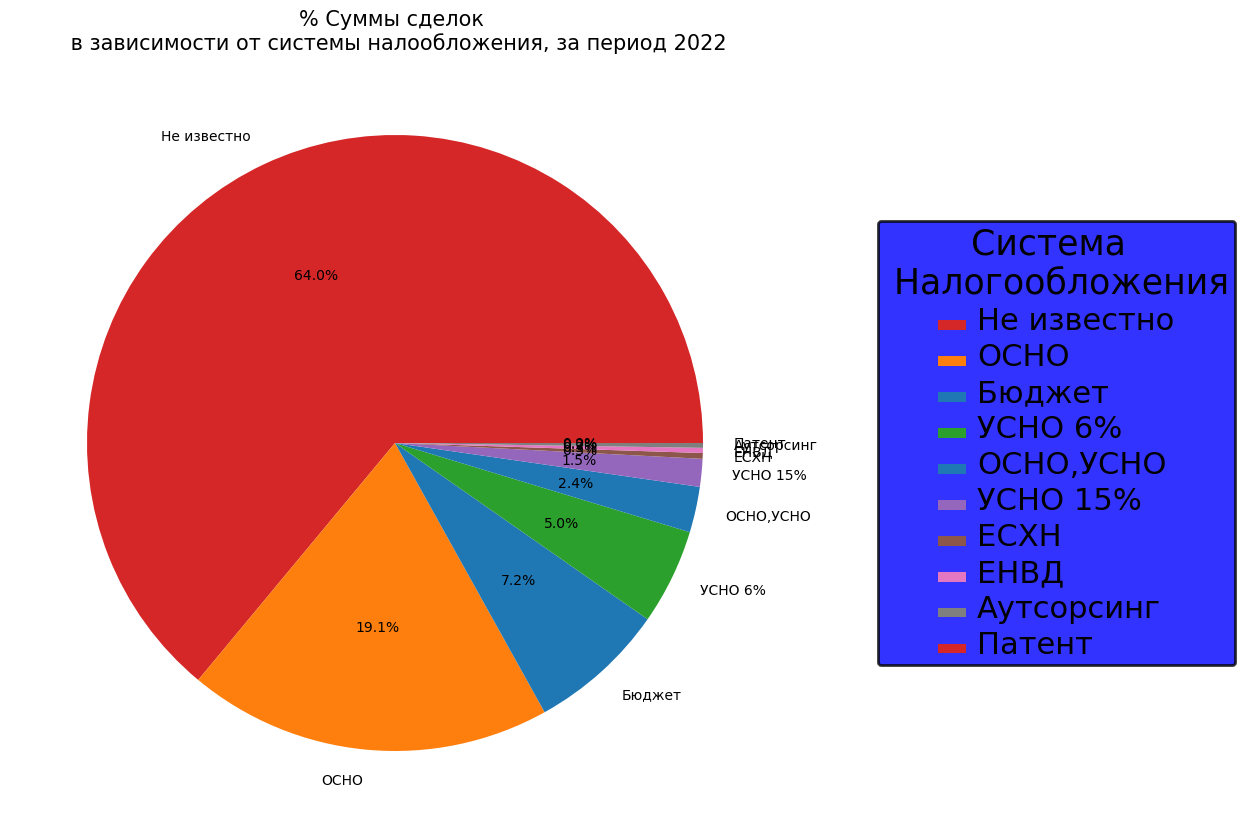

In [41]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаСделки'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

# Рассмотрим выручки компаний по 5 системам налогообложения

# Система Налогообложения ОСНО

In [42]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))] 
quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 54225600.00000001
а у 85% больше 54225600.00000001


У 20% клиентов, у которых была сделка, 
выручка меньше 79858400.0
а у 80% больше 79858400.0


У 25% клиентов, у которых была сделка, 
выручка меньше 107724000.0
а у 75% больше 107724000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 374877000.0
а у 50% больше 374877000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 1149545000.0
а у 25% больше 1149545000.0


# Система Налогообложения Бюджет

In [43]:
b=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='Бюджет'))] 
quantile_15 = b['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = b['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = b['ВыручкаОтПродаж'].quantile(0.25)
median=b['ВыручкаОтПродаж'].median()
quantile_75 =b['ВыручкаОтПродаж'].quantile(0.75)

print('Квартили распределения системы налогообложения Бюджет')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения Бюджет

У 15% клиентов, у которых была сделка, 
выручка меньше 37525500.00000001
а у 85% больше 37525500.00000001


У 20% клиентов, у которых была сделка, 
выручка меньше 86690000.00000003
а у 80% больше 86690000.00000003


У 25% клиентов, у которых была сделка, 
выручка меньше 135854500.0
а у 75% больше 135854500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 1219295000.0
а у 50% больше 1219295000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 10777006500.0
а у 25% больше 10777006500.0


# Система Налогообложения УСНО 6%

In [44]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))] 
quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 9329000.0
а у 85% больше 9329000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 14917400.000000007
а у 80% больше 14917400.000000007


У 25% клиентов, у которых была сделка, 
выручка меньше 23167000.0
а у 75% больше 23167000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 46287000.0
а у 50% больше 46287000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 115979000.0
а у 25% больше 115979000.0


# Система Налогообложения ОСНО,УСНО

In [45]:
osn_usn=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))] 
quantile_15 = osn_usn['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osn_usn['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osn_usn['ВыручкаОтПродаж'].quantile(0.25)
median=osn_usn['ВыручкаОтПродаж'].median()
quantile_75 =osn_usn['ВыручкаОтПродаж'].quantile(0.75)

print('Квартили распределения системы налогообложения ОСНО,УСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО,УСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 28741899.999999996
а у 85% больше 28741899.999999996


У 20% клиентов, у которых была сделка, 
выручка меньше 40954800.000000015
а у 80% больше 40954800.000000015


У 25% клиентов, у которых была сделка, 
выручка меньше 60487500.0
а у 75% больше 60487500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 214643500.0
а у 50% больше 214643500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 929622250.0
а у 25% больше 929622250.0


# Система Налогообложения УСНО 15%

In [46]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))] 
quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [47]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 6843000.0
а у 85% больше 6843000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 11426200.000000002
а у 80% больше 11426200.000000002


У 25% клиентов, у которых была сделка, 
выручка меньше 17655000.0
а у 75% больше 17655000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 49527000.0
а у 50% больше 49527000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 106392000.0
а у 25% больше 106392000.0


# Вывод
- Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 54 млн;
- b) Бюджет выручка компаний от 37.5 млн;
- c) УСНО 6% выручка компаний от 9 млн;
- d) ОСНО,УСНО выручка компаний от 28 млн;
- e) УСНО 15% выручка компаний от 6.8 млн;